Reading the data set using pandas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('gsuite.csv')

Here head retrieves the first 10 of the data set

In [3]:
df.head(10)

,time,metric_name,metric_value
0,2015-03-23T00:00:00.000-0400,google.accounts:apps_total_licenses,0
1,2015-03-23T00:00:00.000-0400,google.accounts:apps_used_licenses,0
2,2015-03-23T00:00:00.000-0400,google.accounts:authorized_apps,0
3,2015-03-23T00:00:00.000-0400,google.accounts:coordinate_total_licenses,0
4,2015-03-23T00:00:00.000-0400,google.accounts:drive_used_quota_in_mb,9537833
5,2015-03-23T00:00:00.000-0400,google.accounts:gmail_used_quota_in_mb,29158045
6,2015-03-23T00:00:00.000-0400,google.accounts:gplus_photos_used_quota_in_mb,659544
7,2015-03-23T00:00:00.000-0400,google.accounts:num_1day_logins,16814
8,2015-03-23T00:00:00.000-0400,google.accounts:num_30day_logins,24022
9,2015-03-23T00:00:00.000-0400,google.accounts:num_7day_logins,21763


Tail gives the last 5 rows in the data set

In [4]:
df.tail()

,time,metric_name,metric_value
611908,2019-08-17T00:00:00.000-0400,google.meet:total_call_minutes_unknown_client,0
611909,2019-08-17T00:00:00.000-0400,google.meet:total_call_minutes_web,0
611910,2019-08-17T00:00:00.000-0400,google.meet:total_meeting_minutes,0
611911,2019-08-17T00:00:00.000-0400,google.sites:num_sites,11130
611912,2019-08-17T00:00:00.000-0400,google.sites:num_sites_created,0


size gives the total data points rows * columns

In [5]:
df.size

1835739

Shape gives the dimensionality of the data set.

In [6]:
df.shape

(611913, 3)

columns gives us the index names and the data type

In [7]:
df.columns

Index(['time', 'metric_name', 'metric_value'], dtype='object')

In [8]:
df['metric_name'].head()

0          google.accounts:apps_total_licenses
1           google.accounts:apps_used_licenses
2              google.accounts:authorized_apps
3    google.accounts:coordinate_total_licenses
4       google.accounts:drive_used_quota_in_mb
Name: metric_name, dtype: object

Gives the two columns metric_name and metric_value.

In [9]:
df[['metric_name','metric_value']].head()

,metric_name,metric_value
0,google.accounts:apps_total_licenses,0
1,google.accounts:apps_used_licenses,0
2,google.accounts:authorized_apps,0
3,google.accounts:coordinate_total_licenses,0
4,google.accounts:drive_used_quota_in_mb,9537833


Sorting the values of a column metric_values

In [10]:
df.sort_values(['metric_value']).head()

,time,metric_name,metric_value
214008,2017-05-18T00:00:00.000-0400,google.drive:num_owned_items_with_visibility_p...,-376732
214021,2017-05-18T00:00:00.000-0400,google.drive:num_owned_other_types_delta,-375495
213993,2017-05-18T00:00:00.000-0400,google.drive:num_owned_items_delta,-374954
213561,2017-05-17T00:00:00.000-0400,google.drive:num_owned_items_with_visibility_p...,-195240
562716,2019-05-08T00:00:00.000-0400,google.drive:num_owned_items_with_visibility_p...,-185944


Retreiving data set with negative values for number of users. We can drop the negative data values for the users

In [11]:
df.loc[(df.metric_value < 0)].head()

,time,metric_name,metric_value
25,2015-03-23T00:00:00.000-0400,google.accounts:total_quota_in_mb,-63989
274,2015-03-24T00:00:00.000-0400,google.accounts:total_quota_in_mb,-64049
523,2015-03-25T00:00:00.000-0400,google.accounts:total_quota_in_mb,-64115
772,2015-03-26T00:00:00.000-0400,google.accounts:total_quota_in_mb,-64154
1021,2015-03-27T00:00:00.000-0400,google.accounts:total_quota_in_mb,-64174


Dropping the rows with negative for metric_vlaues

In [56]:
df = df[df['metric_value'] >= 0]

,time,metric_name,metric_value,month,year


No of values for a particular data, it is like how many times a particular metric_name is repeated. It is sorted by value.

In [13]:
metric_names_counts= df['metric_name'].value_counts()
metric_names_counts.head()

google.docs:num_1day_active_users               1585
google.gmail:num_inbound_delivered_emails       1584
google.gmail:num_inbound_rerouted_emails        1584
google.gmail:num_inbound_unencrypted_emails     1584
google.gmail:num_outbound_unencrypted_emails    1584
Name: metric_name, dtype: int64

sorting the metric_names based on index

In [15]:
metric_names_counts= df['metric_name'].value_counts().sort_index()
metric_names_counts.head()

google._empty_                                593
google.accounts:apps_total_licenses          1161
google.accounts:apps_used_licenses           1161
google.accounts:authorized_apps              1542
google.accounts:coordinate_total_licenses    1161
Name: metric_name, dtype: int64

Finding the metric values with a zero users.

In [16]:
zero_users = df[df.metric_value==0]
zero_users.head()

,time,metric_name,metric_value
0,2015-03-23T00:00:00.000-0400,google.accounts:apps_total_licenses,0
1,2015-03-23T00:00:00.000-0400,google.accounts:apps_used_licenses,0
2,2015-03-23T00:00:00.000-0400,google.accounts:authorized_apps,0
3,2015-03-23T00:00:00.000-0400,google.accounts:coordinate_total_licenses,0
17,2015-03-23T00:00:00.000-0400,google.accounts:num_users_2sv_enforced,0


Metric with maximum number of user

In [17]:
df.metric_value.max()

274032962

Finding all the rows in a dataset with a particular metric_name

In [18]:
df.loc[df['metric_name'] =='google.accounts:authorized_apps'].head()


,time,metric_name,metric_value
2,2015-03-23T00:00:00.000-0400,google.accounts:authorized_apps,0
251,2015-03-24T00:00:00.000-0400,google.accounts:authorized_apps,0
500,2015-03-25T00:00:00.000-0400,google.accounts:authorized_apps,0
749,2015-03-26T00:00:00.000-0400,google.accounts:authorized_apps,0
998,2015-03-27T00:00:00.000-0400,google.accounts:authorized_apps,0


Grouping the rows by a metric_name

In [19]:
for g in df.groupby(['metric_name']):
    print(g)

('google._empty_',                                 time     metric_name  metric_value
186014  2017-03-10T00:00:00.000-0500  google._empty_             0
187884  2017-03-19T00:00:00.000-0400  google._empty_             0
188262  2017-03-20T00:00:00.000-0400  google._empty_             0
188672  2017-03-21T00:00:00.000-0400  google._empty_             0
189093  2017-03-22T00:00:00.000-0400  google._empty_             0
189514  2017-03-23T00:00:00.000-0400  google._empty_             0
189948  2017-03-24T00:00:00.000-0400  google._empty_             0
190366  2017-03-25T00:00:00.000-0400  google._empty_             0
214532  2017-05-20T00:00:00.000-0400  google._empty_           389
214983  2017-05-21T00:00:00.000-0400  google._empty_           474
215434  2017-05-22T00:00:00.000-0400  google._empty_          1379
215885  2017-05-23T00:00:00.000-0400  google._empty_          1378
216336  2017-05-24T00:00:00.000-0400  google._empty_          1309
216635  2017-05-25T00:00:00.000-0400  googl

('google.classroom:num_1day_users',                                 time                      metric_name  \
190822  2017-03-26T00:00:00.000-0400  google.classroom:num_1day_users   
191272  2017-03-27T00:00:00.000-0400  google.classroom:num_1day_users   
191722  2017-03-28T00:00:00.000-0400  google.classroom:num_1day_users   
192172  2017-03-29T00:00:00.000-0400  google.classroom:num_1day_users   
192622  2017-03-30T00:00:00.000-0400  google.classroom:num_1day_users   
193072  2017-03-31T00:00:00.000-0400  google.classroom:num_1day_users   
193522  2017-04-01T00:00:00.000-0400  google.classroom:num_1day_users   
193972  2017-04-02T00:00:00.000-0400  google.classroom:num_1day_users   
194422  2017-04-03T00:00:00.000-0400  google.classroom:num_1day_users   
194872  2017-04-04T00:00:00.000-0400  google.classroom:num_1day_users   
195320  2017-04-05T00:00:00.000-0400  google.classroom:num_1day_users   
195768  2017-04-06T00:00:00.000-0400  google.classroom:num_1day_users   
196218  2017-04

[1464 rows x 3 columns])
('google.device_management:num_1day_ios_2_managed_users',                                 time  \
62      2015-03-23T00:00:00.000-0400   
311     2015-03-24T00:00:00.000-0400   
560     2015-03-25T00:00:00.000-0400   
809     2015-03-26T00:00:00.000-0400   
1058    2015-03-27T00:00:00.000-0400   
1307    2015-03-28T00:00:00.000-0400   
1556    2015-03-29T00:00:00.000-0400   
1805    2015-03-30T00:00:00.000-0400   
2054    2015-03-31T00:00:00.000-0400   
2303    2015-04-01T00:00:00.000-0400   
2552    2015-04-02T00:00:00.000-0400   
2801    2015-04-03T00:00:00.000-0400   
3051    2015-04-04T00:00:00.000-0400   
3301    2015-04-05T00:00:00.000-0400   
3551    2015-04-06T00:00:00.000-0400   
3801    2015-04-07T00:00:00.000-0400   
4051    2015-04-08T00:00:00.000-0400   
4301    2015-04-09T00:00:00.000-0400   
4551    2015-04-10T00:00:00.000-0400   
4801    2015-04-11T00:00:00.000-0400   
5051    2015-04-12T00:00:00.000-0400   
5301    2015-04-13T00:00:00.000-0400 

('google.device_management:num_30day_ios_4_managed_users',                                 time  \
114     2015-03-23T00:00:00.000-0400   
363     2015-03-24T00:00:00.000-0400   
612     2015-03-25T00:00:00.000-0400   
861     2015-03-26T00:00:00.000-0400   
1110    2015-03-27T00:00:00.000-0400   
1359    2015-03-28T00:00:00.000-0400   
1608    2015-03-29T00:00:00.000-0400   
1857    2015-03-30T00:00:00.000-0400   
2106    2015-03-31T00:00:00.000-0400   
2355    2015-04-01T00:00:00.000-0400   
2604    2015-04-02T00:00:00.000-0400   
2853    2015-04-03T00:00:00.000-0400   
3103    2015-04-04T00:00:00.000-0400   
3353    2015-04-05T00:00:00.000-0400   
3603    2015-04-06T00:00:00.000-0400   
3853    2015-04-07T00:00:00.000-0400   
4103    2015-04-08T00:00:00.000-0400   
4353    2015-04-09T00:00:00.000-0400   
4603    2015-04-10T00:00:00.000-0400   
4853    2015-04-11T00:00:00.000-0400   
5103    2015-04-12T00:00:00.000-0400   
5353    2015-04-13T00:00:00.000-0400   
5603    2015-04-14T00

[348 rows x 3 columns])
('google.device_management:num_7day_android_9_0_managed_users',                                 time  \
414184  2018-08-13T00:00:00.000-0400   
414747  2018-08-14T00:00:00.000-0400   
415310  2018-08-15T00:00:00.000-0400   
416224  2018-08-17T00:00:00.000-0400   
416784  2018-08-18T00:00:00.000-0400   
417347  2018-08-19T00:00:00.000-0400   
417910  2018-08-20T00:00:00.000-0400   
418473  2018-08-21T00:00:00.000-0400   
419036  2018-08-22T00:00:00.000-0400   
419597  2018-08-23T00:00:00.000-0400   
420157  2018-08-24T00:00:00.000-0400   
420720  2018-08-25T00:00:00.000-0400   
421283  2018-08-26T00:00:00.000-0400   
421846  2018-08-27T00:00:00.000-0400   
422409  2018-08-28T00:00:00.000-0400   
422972  2018-08-29T00:00:00.000-0400   
423532  2018-08-30T00:00:00.000-0400   
424446  2018-09-01T00:00:00.000-0400   
425007  2018-09-02T00:00:00.000-0400   
425568  2018-09-03T00:00:00.000-0400   
426129  2018-09-04T00:00:00.000-0400   
426690  2018-09-05T00:00:00.000-

('google.docs:num_forms_viewed',                                 time                   metric_name  \
200     2015-03-23T00:00:00.000-0400  google.docs:num_forms_viewed   
449     2015-03-24T00:00:00.000-0400  google.docs:num_forms_viewed   
698     2015-03-25T00:00:00.000-0400  google.docs:num_forms_viewed   
947     2015-03-26T00:00:00.000-0400  google.docs:num_forms_viewed   
1196    2015-03-27T00:00:00.000-0400  google.docs:num_forms_viewed   
1445    2015-03-28T00:00:00.000-0400  google.docs:num_forms_viewed   
1694    2015-03-29T00:00:00.000-0400  google.docs:num_forms_viewed   
1943    2015-03-30T00:00:00.000-0400  google.docs:num_forms_viewed   
2192    2015-03-31T00:00:00.000-0400  google.docs:num_forms_viewed   
2441    2015-04-01T00:00:00.000-0400  google.docs:num_forms_viewed   
2690    2015-04-02T00:00:00.000-0400  google.docs:num_forms_viewed   
2939    2015-04-03T00:00:00.000-0400  google.docs:num_forms_viewed   
3189    2015-04-04T00:00:00.000-0400  google.docs:num_for

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



To find all the metric at has atleast one user

In [ ]:

df[(df['metric_value']>0)].head()

Finding all the metrics which has greater than a 1000 users

In [23]:
df[(df['metric_value']>1000)].head()

,time,metric_name,metric_value
4,2015-03-23T00:00:00.000-0400,google.accounts:drive_used_quota_in_mb,9537833
5,2015-03-23T00:00:00.000-0400,google.accounts:gmail_used_quota_in_mb,29158045
6,2015-03-23T00:00:00.000-0400,google.accounts:gplus_photos_used_quota_in_mb,659544
7,2015-03-23T00:00:00.000-0400,google.accounts:num_1day_logins,16814
8,2015-03-23T00:00:00.000-0400,google.accounts:num_30day_logins,24022


Analysis using Date/Time data type
dtypes gives the data types in the data set

In [24]:
df.dtypes

time            object
metric_name     object
metric_value     int64
dtype: object

Changing time object to pandas datatime data type

In [25]:
df['time']= pd.to_datetime(df.time)

In [26]:
df.dtypes

time            datetime64[ns]
metric_name             object
metric_value             int64
dtype: object

In [27]:
df.head()

,time,metric_name,metric_value
0,2015-03-23 04:00:00,google.accounts:apps_total_licenses,0
1,2015-03-23 04:00:00,google.accounts:apps_used_licenses,0
2,2015-03-23 04:00:00,google.accounts:authorized_apps,0
3,2015-03-23 04:00:00,google.accounts:coordinate_total_licenses,0
4,2015-03-23 04:00:00,google.accounts:drive_used_quota_in_mb,9537833


In [28]:
# Different ways we can use the datatime functionalities in pandas
df.time.dt.weekday_name #prints the days of the week for time column
df.time.dt.dayofyear  # prints which of the year is it for the entire time column

# Retrieving columns after a particular date

timestamp= pd.to_datetime('07/19/2019')
df.loc[df.time>= timestamp,:].head()




,time,metric_name,metric_value
597046,2019-07-19 04:00:00,google.accounts:authorized_apps,0
597047,2019-07-19 04:00:00,google.accounts:drive_used_quota_in_mb,175724121
597048,2019-07-19 04:00:00,google.accounts:gmail_used_quota_in_mb,89342759
597049,2019-07-19 04:00:00,google.accounts:gplus_photos_used_quota_in_mb,2818742
597050,2019-07-19 04:00:00,google.accounts:num_1day_logins,3017


Finding over how many days the data is collected 

In [29]:
df.time.max()-df.time.min()

Timedelta('1608 days 00:00:00')

Taking a column by month on which data is collected

In [30]:
df['month']= df.time.dt.month

Plotting the data against month.

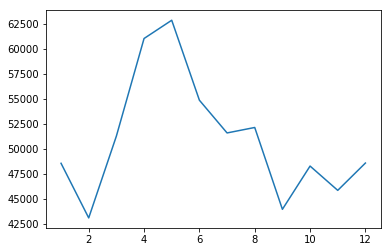

In [31]:
df.month.value_counts().sort_index().plot()

Similarly, finding the data column by year and plotting the data against month

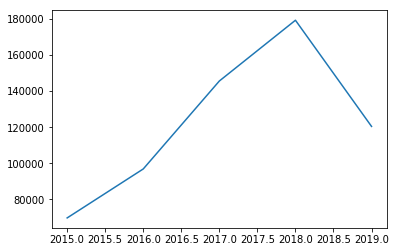

In [32]:
df['year']= df.time.dt.year
df.year.value_counts().sort_index().plot()

In [33]:
df.dtypes

time            datetime64[ns]
metric_name             object
metric_value             int64
month                    int64
year                     int64
dtype: object

Changing the mm/dd/yy 00:00:00 to only mm/dd/yy format

In [ ]:
df['time']= df.time.dt.date

In [43]:
df.head()

,time,metric_name,metric_value,month,year
0,2015-03-23,google.accounts:apps_total_licenses,0,3,2015
1,2015-03-23,google.accounts:apps_used_licenses,0,3,2015
2,2015-03-23,google.accounts:authorized_apps,0,3,2015
3,2015-03-23,google.accounts:coordinate_total_licenses,0,3,2015
4,2015-03-23,google.accounts:drive_used_quota_in_mb,9537833,3,2015


In [44]:
df.index

RangeIndex(start=0, stop=611913, step=1)